In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif


In [95]:
custom_palette = ['#b62b2b', '#3e0707', '#d95656', '#320202', '#f6adad']
sns.set_palette(custom_palette)

In [186]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_failure_clinical_records = fetch_ucirepo(id=519) 
  
# data (as pandas dataframes) 
X = heart_failure_clinical_records.data.features 
y = heart_failure_clinical_records.data.targets 
  
# metadata 
print(heart_failure_clinical_records.metadata) 
  
# variable information 
print(heart_failure_clinical_records.variables) 


{'uci_id': 519, 'name': 'Heart Failure Clinical Records', 'repository_url': 'https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records', 'data_url': 'https://archive.ics.uci.edu/static/public/519/data.csv', 'abstract': 'This dataset contains the medical records of 299 patients who had heart failure, collected during their follow-up period, where each patient profile has 13 clinical features.', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 299, 'num_features': 12, 'feature_types': ['Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['death_event'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C5Z89R', 'creators': [], 'intro_paper': {'ID': 286, 'type': 'NATIVE', 'title': 'Machine learning can predict survival of patients with heart failure f

In [22]:
df = pd.concat([X, y], axis=1)
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


# EDA

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [107]:
# 0                        age  Feature     Integer         Age   
# 1                    anaemia  Feature      Binary        None   
# 2   creatinine_phosphokinase  Feature     Integer        None   
# 3                   diabetes  Feature      Binary        None   
# 4          ejection_fraction  Feature     Integer        None   
# 5        high_blood_pressure  Feature      Binary        None   
# 6                  platelets  Feature  Continuous        None   
# 7           serum_creatinine  Feature  Continuous        None   
# 8               serum_sodium  Feature     Integer        None   
# 9                        sex  Feature      Binary         Sex   
# 10                   smoking  Feature      Binary        None   
# 11                      time  Feature     Integer        None   
# 12               death_event   Target      Binary        None 

num_vars = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
cat_vars = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

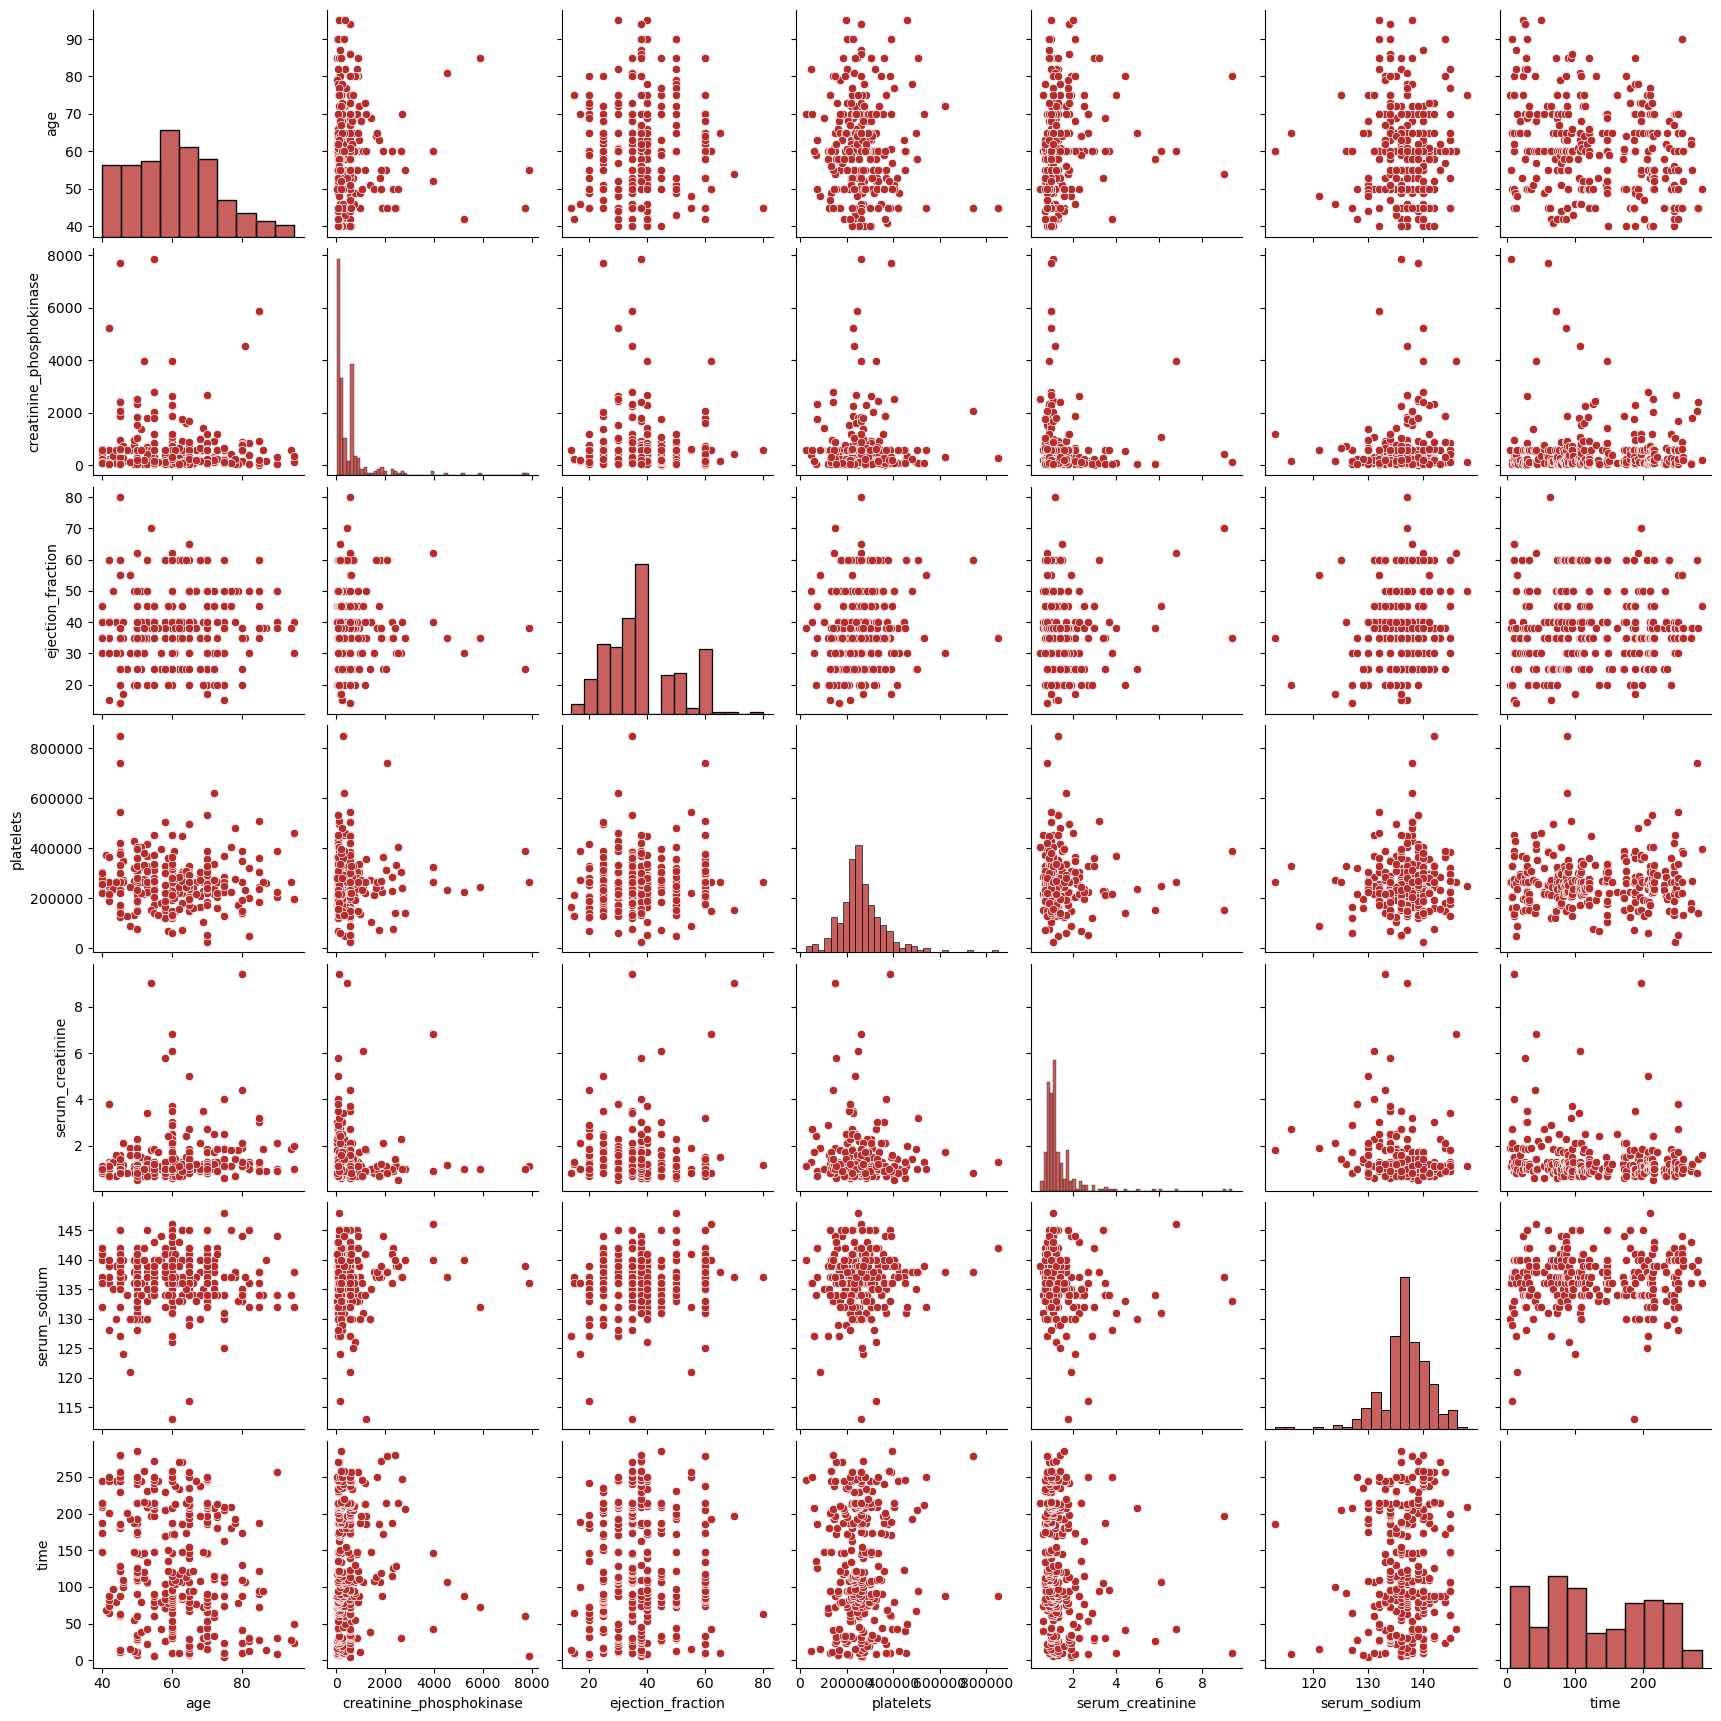

In [108]:
sns.pairplot(df[num_vars])

In [52]:
def create_boxplot(data, x, y, ax):
    ax = sns.boxplot(data=data, x=x, y=y, ax=ax)


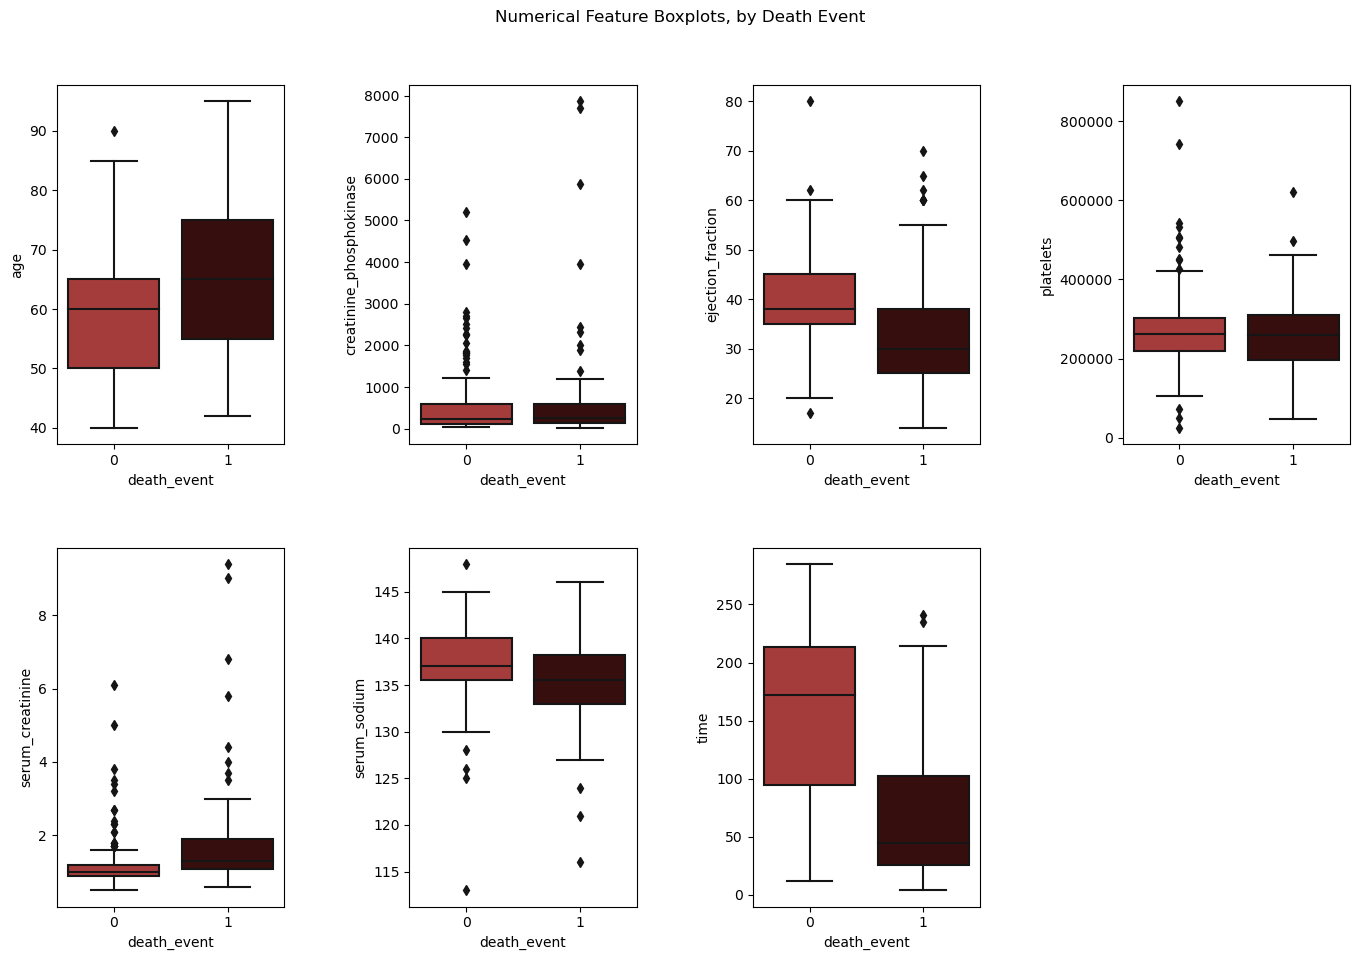

In [163]:
fig, axs = plt.subplots(2, 4, figsize=(14, 10), layout='constrained')

ax = create_boxplot(data=df, x='death_event', y=num_vars[0], ax=axs[0, 0])
ax = create_boxplot(data=df, x='death_event', y=num_vars[1], ax=axs[0, 1])
ax = create_boxplot(data=df, x='death_event', y=num_vars[2], ax=axs[0, 2])
ax = create_boxplot(data=df, x='death_event', y=num_vars[3], ax=axs[0, 3])
ax = create_boxplot(data=df, x='death_event', y=num_vars[4], ax=axs[1, 0])
ax = create_boxplot(data=df, x='death_event', y=num_vars[5], ax=axs[1, 1])
ax = create_boxplot(data=df, x='death_event', y=num_vars[6], ax=axs[1, 2])
axs[1, 3].axis('off')

fig.get_layout_engine().set(w_pad=3/10, h_pad=3/10, hspace=0,
                            wspace=0)
fig.suptitle('Numerical Feature Boxplots, by Death Event')
plt.show()

<Axes: >

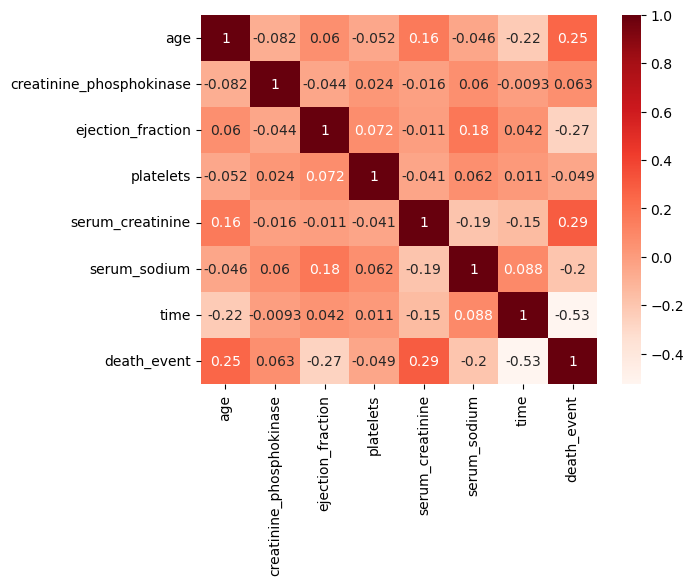

In [130]:
corr = df[num_vars + ['death_event']].corr()
sns.heatmap(corr, annot=True, cmap="Reds")

Text(0.5, 1.0, 'Deat Event Counts')

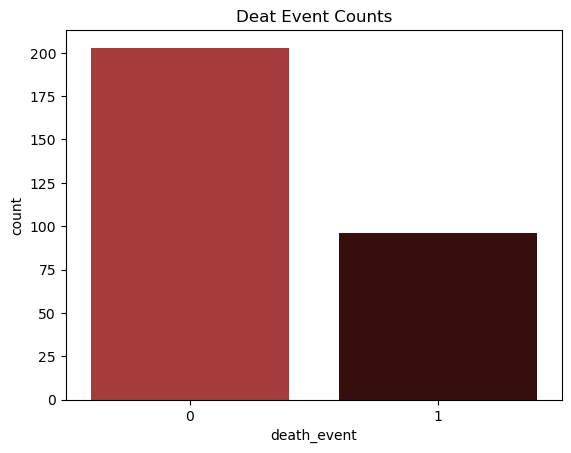

In [121]:
fig = sns.countplot(x=df['death_event'])
plt.title('Deat Event Counts')

In [133]:
for var in cat_vars:
    print(df[var].value_counts())

0    170
1    129
Name: anaemia, dtype: int64
0    174
1    125
Name: diabetes, dtype: int64
0    194
1    105
Name: high_blood_pressure, dtype: int64
1    194
0    105
Name: sex, dtype: int64
0    203
1     96
Name: smoking, dtype: int64


In [160]:
df['anaemia'].value_counts(normalize=True).index

Int64Index([0, 1], dtype='int64')

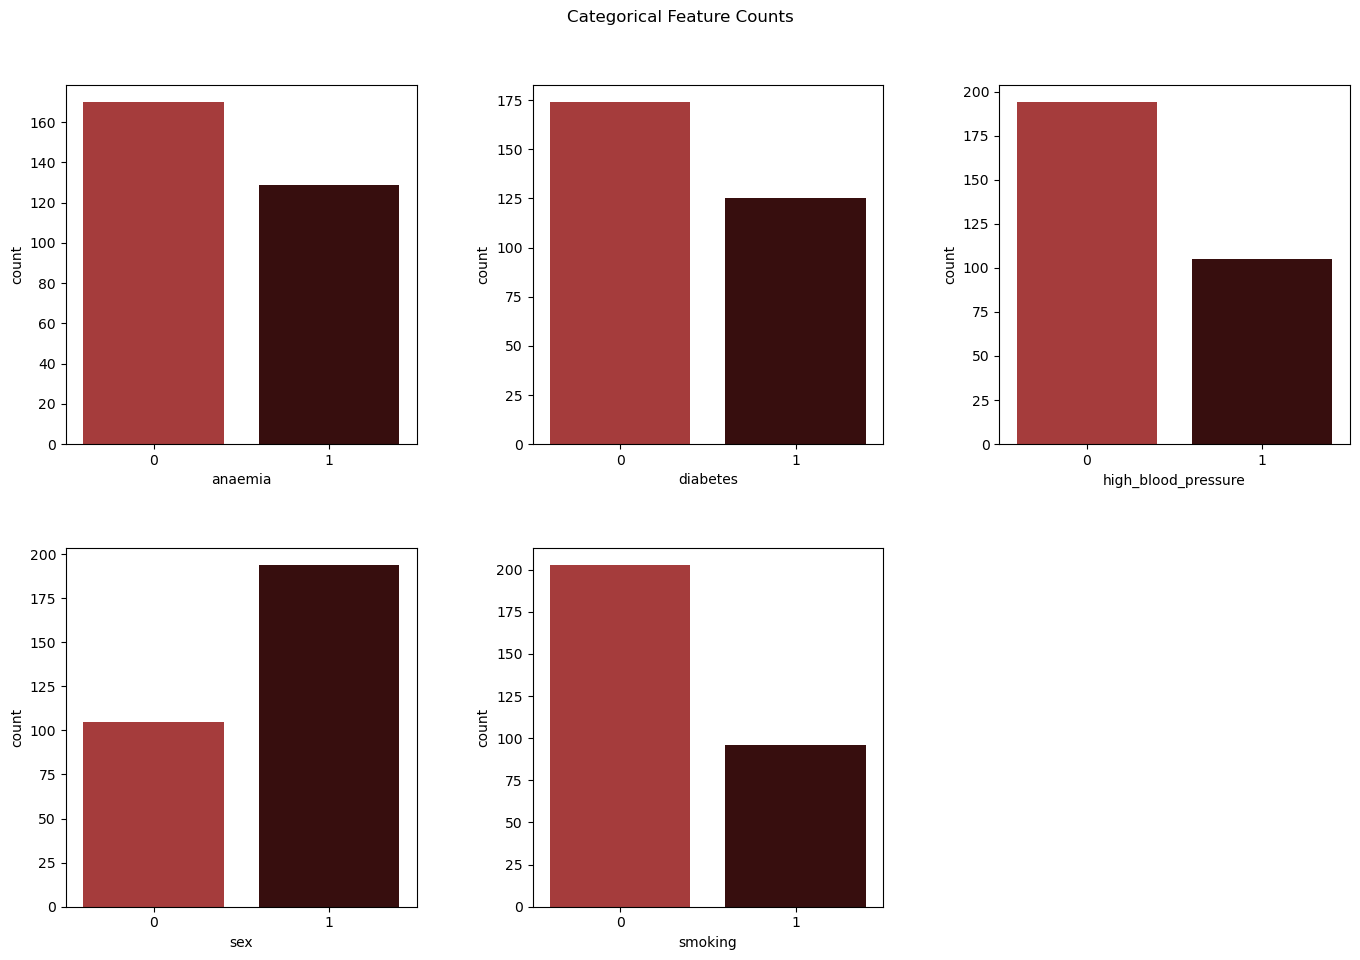

In [162]:
fig, axs = plt.subplots(2, 3, figsize=(14, 10), layout='constrained')

#ax = sns.barplot(x=df[cat_vars[0]].value_counts(normalize=True).index, y=df[cat_vars[0]].value_counts(normalize=True).values, ax=axs[0, 0])
ax = sns.countplot(data=df, x=cat_vars[0], ax=axs[0, 0])
ax = sns.countplot(data=df, x=cat_vars[1], ax=axs[0, 1])
ax = sns.countplot(data=df, x=cat_vars[2], ax=axs[0, 2])
ax = sns.countplot(data=df, x=cat_vars[3], ax=axs[1, 0])
ax = sns.countplot(data=df, x=cat_vars[4], ax=axs[1, 1])
axs[1, 2].axis('off')

fig.get_layout_engine().set(w_pad=3/10, h_pad=3/10, hspace=0,
                            wspace=0)
fig.suptitle('Categorical Feature Counts')
plt.show()

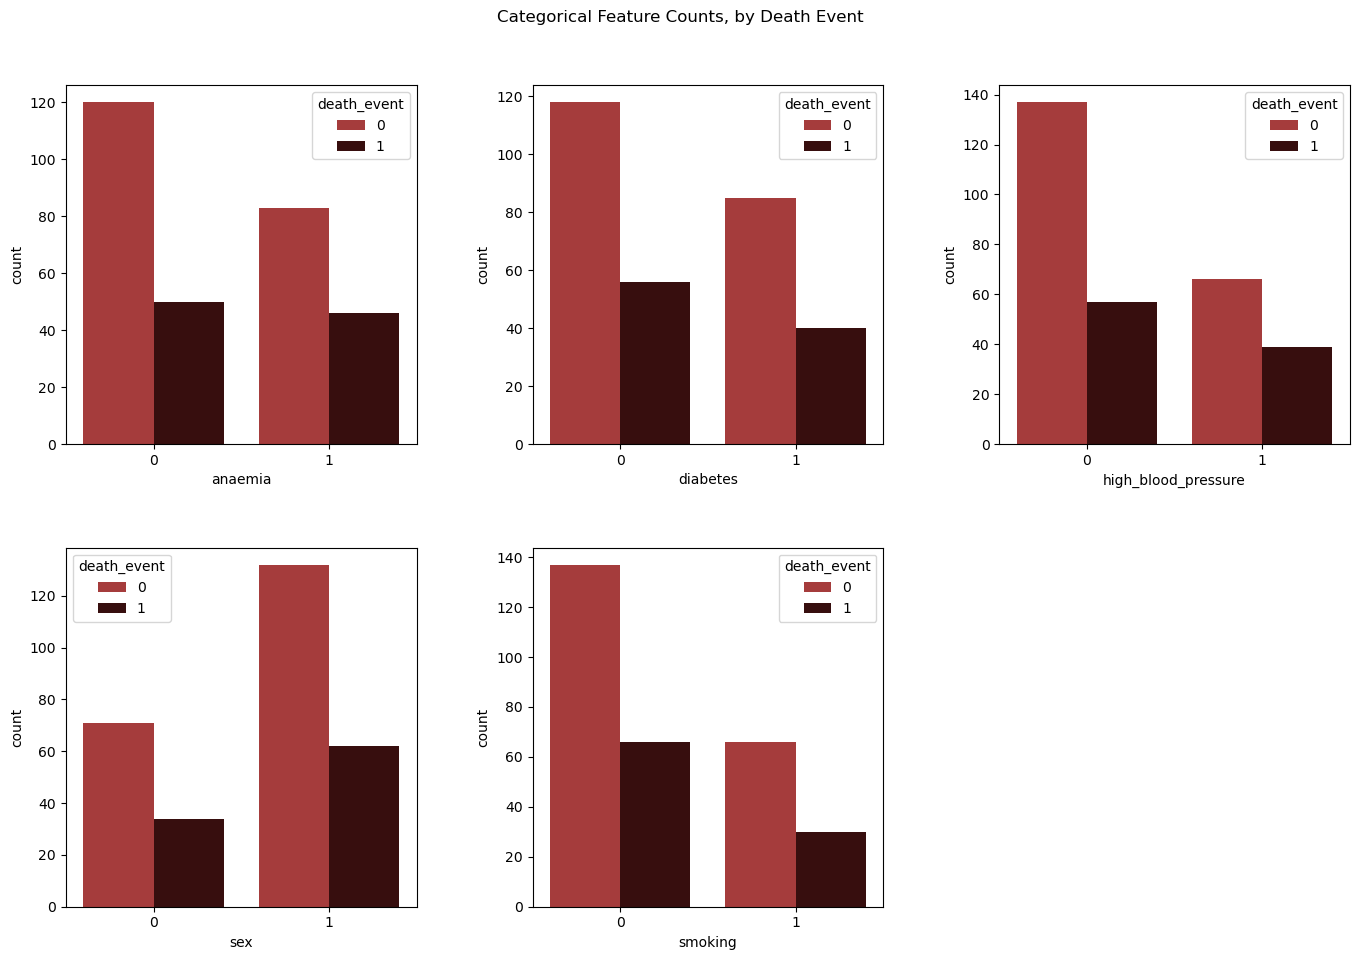

In [140]:
fig, axs = plt.subplots(2, 3, figsize=(14, 10), layout='constrained')

ax = sns.countplot(data=df, x=cat_vars[0], ax=axs[0, 0], hue='death_event')
ax = sns.countplot(data=df, x=cat_vars[1], ax=axs[0, 1], hue='death_event')
ax = sns.countplot(data=df, x=cat_vars[2], ax=axs[0, 2], hue='death_event')
ax = sns.countplot(data=df, x=cat_vars[3], ax=axs[1, 0], hue='death_event')
ax = sns.countplot(data=df, x=cat_vars[4], ax=axs[1, 1], hue='death_event')
axs[1, 2].axis('off')

fig.get_layout_engine().set(w_pad=3/10, h_pad=3/10, hspace=0,
                            wspace=0)
fig.suptitle('Categorical Feature Counts, by Death Event')
plt.show()

In [138]:
def create_grouped_stacked_chart(data, var, hue, ax, title=None):
    df = data.groupby([var, hue]).size().unstack()
    
    ax = df.plot(kind='bar', stacked=True, ax=ax)
    ax.tick_params(axis='x', labelrotation=0)
    ax.set_ylabel('Count')
    ax.set_title(title)

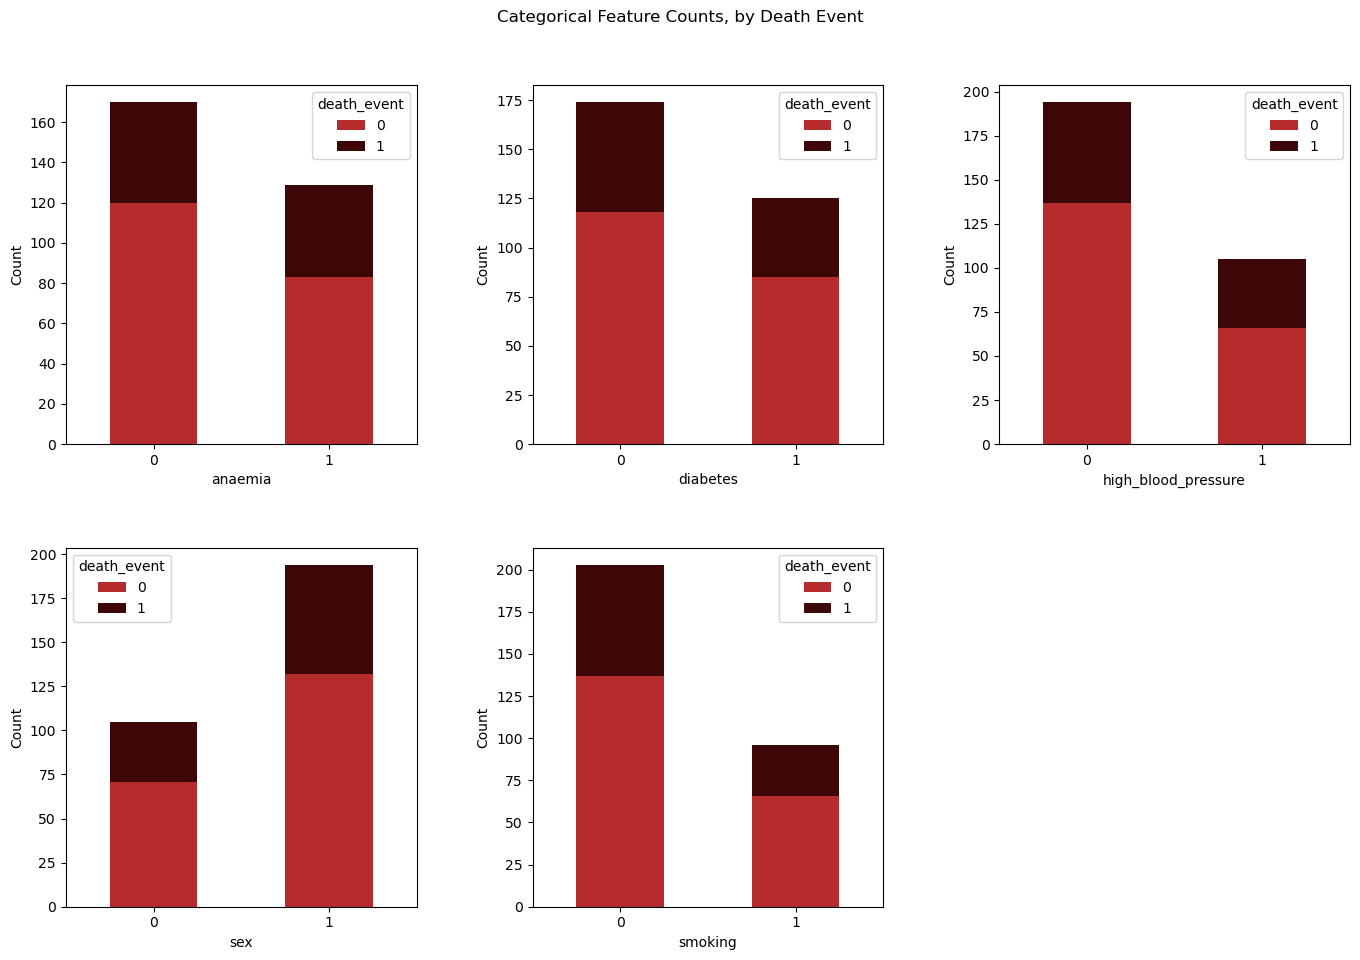

In [141]:
fig, axs = plt.subplots(2, 3, figsize=(14, 10), layout='constrained')

ax = create_grouped_stacked_chart(data=df, var=cat_vars[0], ax=axs[0, 0], hue='death_event')
ax = create_grouped_stacked_chart(data=df, var=cat_vars[1], ax=axs[0, 1], hue='death_event')
ax = create_grouped_stacked_chart(data=df, var=cat_vars[2], ax=axs[0, 2], hue='death_event')
ax = create_grouped_stacked_chart(data=df, var=cat_vars[3], ax=axs[1, 0], hue='death_event')
ax = create_grouped_stacked_chart(data=df, var=cat_vars[4], ax=axs[1, 1], hue='death_event')
axs[1, 2].axis('off')

fig.get_layout_engine().set(w_pad=3/10, h_pad=3/10, hspace=0,
                            wspace=0)
fig.suptitle('Categorical Feature Counts, by Death Event')
plt.show()

<Axes: >

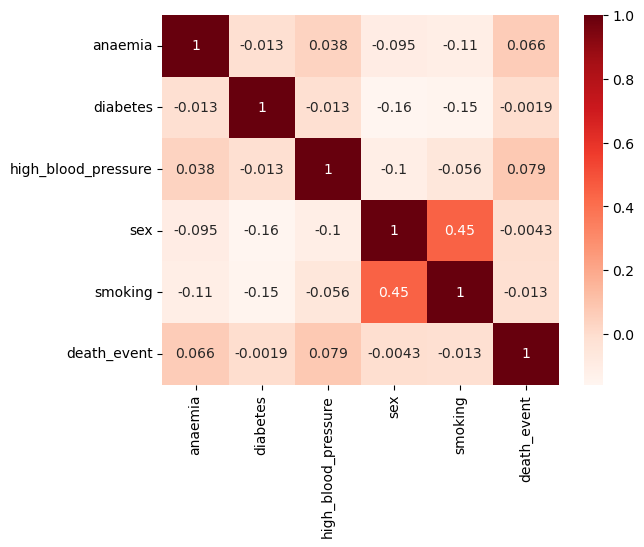

In [129]:
import seaborn as sns

corr = df[cat_vars + ['death_event']].corr()
sns.heatmap(corr, annot=True, cmap="Reds")


In [216]:
X = df[cat_vars]
y = df['death_event']
mi = mutual_info_classif(X, y, discrete_features=True)

mi_df = pd.DataFrame({'Feature': X.columns.tolist(), 'Mutual Information': mi})
mi_df = mi_df.sort_values(by="Mutual Information", ascending=False).reset_index(drop=True)
mi_df

,Feature,Mutual Information
0,high_blood_pressure,0.003115
1,anaemia,0.002188
2,smoking,0.000080
3,sex,0.000009
4,diabetes,0.000002


In [217]:
X = df[num_vars]
y = df['death_event']
mi = mutual_info_classif(X, y, discrete_features=False)

mi_df = pd.DataFrame({'Feature': X.columns.tolist(), 'Mutual Information': mi})
mi_df = mi_df.sort_values(by="Mutual Information", ascending=False).reset_index(drop=True)
mi_df

,Feature,Mutual Information
0,time,0.244588
1,ejection_fraction,0.106737
2,serum_creatinine,0.095567
3,age,0.031950
4,creatinine_phosphokinase,0.031318
5,serum_sodium,0.007695
6,platelets,0.000000
